In [85]:
import matplotlib.pyplot as plt
import numpy as np 
from IPython.core.display import display, HTML
from arc import * 
from arc.advanced.population_lifetime import getPopulationLifetime
import arc.calculations_atom_single
import arc.alkali_atom_data
import arc.calculations_atom_pairstate
from matplotlib import pyplot as plt
import numpy as np
from arc.materials import Sapphire
from arc import DynamicPolarizability
from arc.calculations_atom_single import DynamicPolarizability
import scipy.constants as sp

In [86]:
atom=Rubidium()

In [87]:
#Code to calculate difference in frequency
lambda1=1012.74153*10**(-9)
lambda2=1012.74141*10**(-9)
Deltanu=sp.c*((1/lambda1)-(1/lambda2))
print(Deltanu/10**6)

-35.07557193726903


In [88]:
#for i in range(10,100,1):
    #for k in range(0,2,1):
       # L_i=atom.getTransitionFrequency(84, 1, 1.5, 85, 0, 0.5, s=0.5, s2=0.5)/10**9
        #if L_i>=-25 and L_i<=25:  
           # print(i, k, L_i, 'GHz')
L=atom.getTransitionFrequency(84, 1, 1.5, 85, 0, 0.5, s=0.5, s2=0.5)/10**9
print(L)
        

6.179159901614509


In [96]:
#Code to calculate density
N=2563
R1=(36.72)*3.125
R2=(43.21)*3.125
AvR=(R1+R2)/(2*np.sqrt(2))
D=(N/((4/3)*sp.pi*(AvR*10**(-4))**3))
print(D)
scientific_notation="{:e}".format(D)
print(scientific_notation)
AverageR =(R1+R2)/(2*np.sqrt(2))
print(AverageR)
Int_dist=(1/D)**(1/3)
print(Int_dist*10**4)

888414163.0281309
8.884142e+08
88.31100784412615
10.402271280220397


In [76]:
R=atom.getRabiFrequency(70, 0, 0.5, 0.5, 6, 1, 1.5, -1, 20*10**(-3), 200*10**(-9), s=0.5)
print(R/(2*sp.pi))


1032573642.5902373


In [14]:
#Code to calculate the lifetime of a level
L=atom.getStateLifetime(71, 1, 1.5, temperature=0.000150, includeLevelsUpTo=71, s=0.5)
scientific_notation="{:e}".format(L)
print("The lifetime of the 70P3/2 is: mus", scientific_notation)
L=atom.getStateLifetime(69, 2, 2.5, temperature=0.000150, includeLevelsUpTo=69, s=0.5)
scientific_notation="{:e}".format(L)
print(scientific_notation)

The lifetime of the 70P3/2 is: mus 7.865138e-04
3.363565e-04


In [9]:
#Code to calculate the 3-Ph Rabi Frequency starting from the slope 70 P 1/2
#Excitation volume
N=154053 #N atoms 84000 la precedente
b=1.86 #slope 
gamma=2*np.pi*0.7 #dephasing rate in MHz
wb=40 #blue waist in micron 
Vexc=wb**2*(2*np.pi)**(1.5)*AverageR #Excitation volume
Vmot=(4/3)*np.pi*AverageR**3 #MOT Volume
print(Vexc/10**6)
print('Per il 70 S 1/2')
Rabi_two=(np.sqrt(b*2*gamma*Vmot/(Vexc*N*0.4)))/(2*np.pi) #2-Photon Rabi Frequency
print('The 2-Photon Rabi Frequency calculated with the slope is:',Rabi_two*10**3, 'kHz')
#Deexcitation
Gamma2=0.55
Gammareal=Gamma2/()
OmegaIR=np.sqrt(2*gamma*Gamma2*Vmot/(Vexc*N*0.4))/(2*np.pi)
print('La frequenza di Rabi dell IR è:',OmegaIR)

Omegab=44.4 #Rabi Frequency Blue in MHz 
OmegaIr=5.45 #Rabi Frequency IR in MHz
OmegaMw=36.86 # Rabi Frequency Microwave for 9 dB attenuation in MHz
Deltab=350 #Detuning Blue in MHz
DeltaIr=86.6 #Detuning IR in MHz
Rabith=(Omegab*OmegaIr*OmegaMw)/(Deltab*DeltaIr)
#print('The 3-Photon Rabi Frequency calculated with the theoretical formula is:', Rabith*10**3, 'kHz')

2.4314104198165647
Per il 70 S 1/2
The 2-Photon Rabi Frequency calculated with the slope is: 3.226141266963372 kHz


TypeError: unsupported operand type(s) for /: 'float' and 'tuple'

In [17]:
#Code to calculate the 3-Ph Rabi Frequency starting from the slope 70 P 3/2
#Excitation volume
N=57343 #atoms
b=9.89
gamma=2*np.pi*0.7 #MHz
wb=40 #micron
Vexc=wb**2*(2*np.pi)**(1.5)*AverageR
Vmot=(4/3)*np.pi*AverageR**3
print(Vexc/10**6)
print('Per il 70 P 3/2')
Rabi_three=np.sqrt(b*2*gamma*Vmot/(0.4*Vexc*N))/(2*np.pi)
print('The 3-Photon Rabi Frequency calculated with the slope is:',Rabi_three*10**3, 'kHz')
Omegab=44.4 #Rabi Frequency Blue in MHz
OmegaIr=5.45 #Rabi Frequency IR in MHz
OmegaMw=43.4 # Rabi Frequency Microwave for 16 dB attenuation in MHz
Deltab=350 #Detuning Blue in MHz
DeltaIr=86.6 #Detuning IR in MHz
Rabith=(Omegab*OmegaIr*OmegaMw)/(Deltab*DeltaIr)
print('The 3-Photon Rabi Frequency calculated with the theoretical formula is:', Rabith, 'MHz')

2.8526544327768835
Per il 70 P 3/2
The 3-Photon Rabi Frequency calculated with the slope is: 14.30575623444873 kHz
The 3-Photon Rabi Frequency calculated with the theoretical formula is: 0.34648406466512705 MHz


In [112]:
#Code to calculate the different dipole matrix element  for the splitting Autler-Townes for 70S-70P
D1=atom.getDipoleMatrixElement(70, 1, 0.5, 1.5, 70, 0, 0.5, 0.5, 1, s=0.5)
D2=atom.getDipoleMatrixElement(70, 1, 0.5, 0.5, 70, 0, 0.5, 0.5, 1, s=0.5)
D3=atom.getDipoleMatrixElement(70, 1, 0.5, -0.5, 70, 0, 0.5, 0.5, -1, s=0.5)


In [113]:
#Interaction Potential for 70S1/2
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,0,j0,n0,1,j0, mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks


LeRoy radius = 1.5 mum


KeyboardInterrupt: 

In [ ]:
PairStateInteractions.getC6fromLevelDiagram(rStart, rStop, showPlot=False, minStateContribution=0.0)

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  4114 )

Matrix R3 100.0 % (state 1048 of 1048)



Diagonalizing interaction matrix...

99% Now we are plotting...


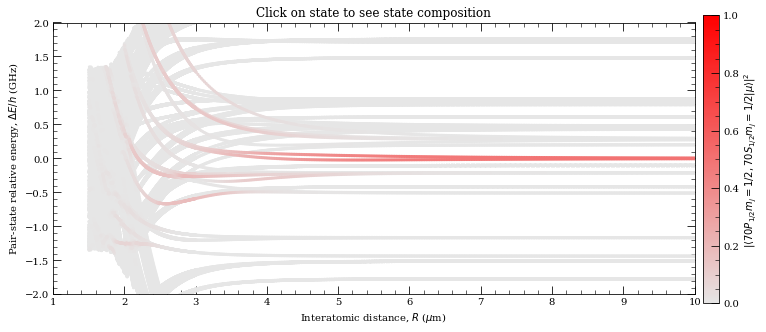

0

In [6]:
#Interaction Potential for 70S1/2
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,1,j0,n0,0,j0, mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks


In [7]:
#Interaction Potential for 70S1/2
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,2,j0,n0,0,j0, mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  5056 )

Matrix R3 100.0 % (state 1128 of 1128)



Diagonalizing interaction matrix...

3%

KeyboardInterrupt: 

LeRoy radius = 1.6 mum

Calculating Hamiltonian matrix...


	matrix (dimension  4635 )

Matrix R3 100.0 % (state 1175 of 1175)



Diagonalizing interaction matrix...

99% Now we are plotting...


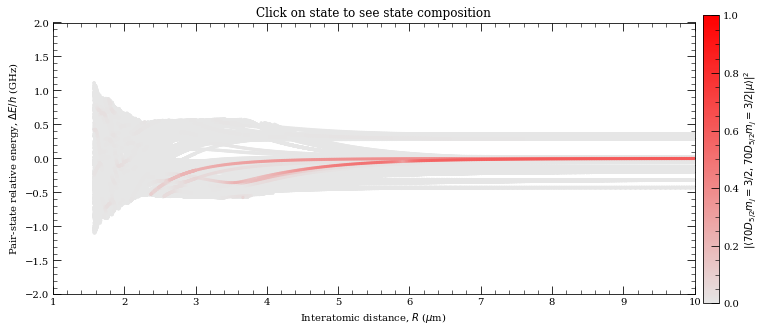

0

In [8]:
#Interaction Potential for 70D5/2
#=================================
n0=70;j0=2.5;mj0=1.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,2,j0,n0,2,j0, mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  4108 )

Matrix R3 100.0 % (state 1044 of 1044)



Diagonalizing interaction matrix...

99% Now we are plotting...


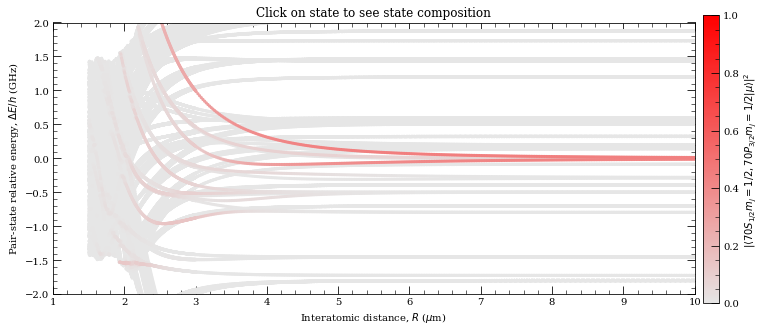

0

In [9]:
#Interaction Potential for 70D5/2
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,0,j0,n0,1, 1.5,mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  4108 )

Matrix R3 100.0 % (state 1044 of 1044)



Diagonalizing interaction matrix...

99% Now we are plotting...


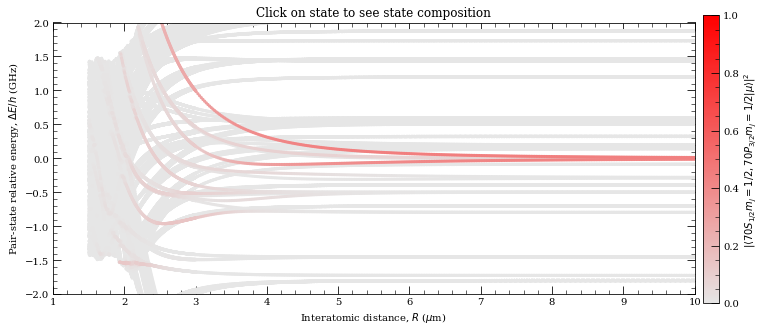

0

In [13]:
#Interaction Potential for 70S 1/2-70P3/2 for 70S 1/2-70P3/2 for phi=200
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=2*np.pi/3; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,0,j0,n0,1, 1.5,mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  4108 )

Matrix R3 100.0 % (state 1044 of 1044)



Diagonalizing interaction matrix...

99% Now we are plotting...


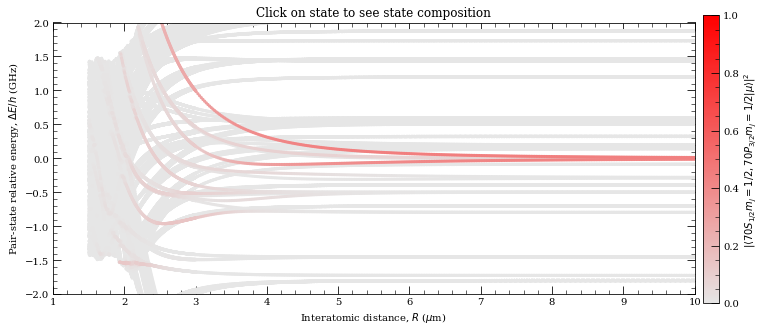

0

In [14]:
#Interaction Potential for 70S 1/2-70P3/2 for phi=200
#=================================
n0=70;j0=0.5;mj0=0.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=4*np.pi/3; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,0,j0,n0,1, 1.5,mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

LeRoy radius = 1.5 mum

Calculating Hamiltonian matrix...


	matrix (dimension  2547 )

Matrix R3 100.0 % (state 889 of 889)



Diagonalizing interaction matrix...

99% Now we are plotting...


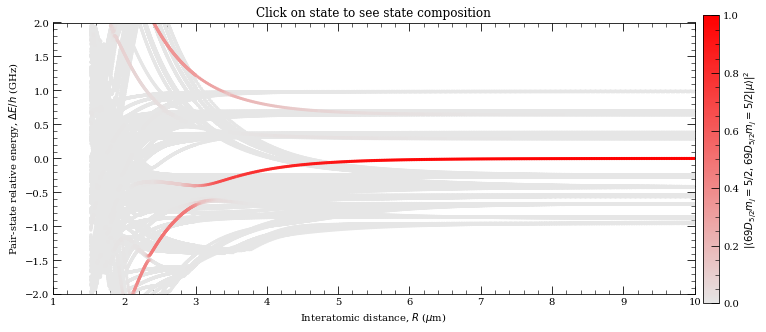

0

In [16]:
#Interaction Potential for 70S 1/2-70P3/2 for phi=200
#=================================
n0=69;j0=2.5;mj0=2.5; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Rubidium87(), n0,2,j0,n0,2, 2.5,mj0,mj0,interactionsUpTo = 1)

rvdw = calc.getLeRoyRadius()
print("LeRoy radius = %.1f mum" % rvdw)
#R array (um)
r=np.append(np.linspace(rvdw,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

In [129]:
Rabith=(Omegab*OmegaIr*OmegaMw)/(Deltab*DeltaIr-OmegaIr**2)
print(Rabith*10**3)
Rabith1=(0.334*36.83)/(86.6)
print(Rabith1)
Rabi_three=np.sqrt(b*2*gamma*Vmot/(Vexc*N*0.4)) #3-Photon Rabi Frequency
Rabi2=0.090
N=57343


#Code to calculate density
N=59517
R1=(47.09)*3.125
R2=(44.58)*3.125
AvR=(R1+R2)/(2*np.sqrt(2))
D=(N/((4/3)*sp.pi*(AvR*10**(-4))**3))
scientific_notation="{:e}".format(D)
print(scientific_notation)
AverageR =(R1+R2)/(2*np.sqrt(2))
print(AverageR)
Vexc=wb**2*(2*np.pi)**(1.5)*AverageR #Excitation volume
Vmot=(4/3)*np.pi*AverageR**3 #MOT Volume
print(Vexc/10**6)
Rabi22=np.sqrt(31.24*2*gamma*Vmot/(Vexc*N*0.4))
print(Rabi22)

b1=(Rabi2**2*Vexc*N*0.4)/(2*gamma*Vmot)
print(b1)

346.8239372483048
0.14204642032332565
1.367589e+10
101.28199786151688
2.552243137347813
0.14029449317287468
12.856264389748235


In [92]:
import time, os, sys
try:
  import numpy as np
except:
  !pip install numpy
  import numpy as np

try:
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm
except:
  !pip install scipy== 1.2.1
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm

try:
  import sympy as sp
  from sympy.physics.quantum import TensorProduct
except:
  !pip install sympy
  import sympy as sp
  from sympy.physics.quantum import TensorProduct

try:
  import matplotlib.pyplot as plt
except:
  !pip install matplotlib
  import matplotlib.pyplot as plt
%matplotlib inline

try:
  import qutip as qt
except:
  !pip install qutip
  import qutip as qt

import warnings
warnings.filterwarnings('ignore')





!pip install ARC-Alkali-Rydberg-Calculator 
# import ARC-Alkali-Rydberg-Calculator as arc
from arc import *



#laser parameters 
waistIR = 90.e-6 # 50 mu m
waistblue = 50.e-6 # 50 mu m
P = 500.e-3 # 500 mW
q = -1;




#atom parameters 
atom = Rubidium()
Pblue=1.1*(10**-3)# milliwatt
PIR=32.9*(10**-3)# milliwatt


mj1_list=[-1/2.,1/2.]
mj2_list=[-3/2.,-1/2.,1/2.,3/2.]
mj3_list=[-1/2.,1/2.]
mj4_list=[-3/2.,-1/2.,1/2.,3/2.]
OmegaR=[0,0]
for i in range(len(mj1_list)):
  for j in range(len(mj2_list)):
        n1 =5; l1 = 0; j1 = 0.5; mj1=mj1_list[i];
        n2 =6 ; l2 = 1; j2 = 1.5; mj2 =mj2_list[j];
        OmegaR[0]=OmegaR[0]+atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, 0, Pblue, waistblue)/(len(mj1_list)*len(mj2_list)*2.*np.pi*(10**6))

for j in range(len(mj2_list)):
  for k in range(len(mj3_list)):
        n2 =6 ; l2 = 1; j2 = 1.5; mj2 =mj2_list[j];
        n3 =70 ; l3 = 0; j3 = 0.5; mj3 = mj3_list[k];
        OmegaR[1]=OmegaR[1]+atom.getRabiFrequency(n2, l2, j2, mj2, n3, l3, j3,0, PIR, waistIR)/(len(mj2_list)*len(mj3_list)*2.*np.pi*(10**6))

  


Omega_RMW_new=36.86

Omega_3=OmegaR[0]*OmegaR[1]*Omega_RMW_new/350/86.6

print("Rabi freq blue ",OmegaR[0], "MHz")
print("Rabi freq IR ",OmegaR[1], "MHz")

print("Rabi two photon is ",OmegaR[0]*OmegaR[1]/350, "MHz")

print("Rabi three photon is ",Omega_3, "MHz")
# print("number of atoms detected on the 70P3/2 state is ",Omega_3*Omega_3/2/(2*np.pi*0.7)*10**6*(5*10**(-6))*223409*40/100*50*50/229/229)
print("number of atoms detected on the 70P3/2 state is ",Omega_3*Omega_3/2/(2*np.pi*0.7)*10**6*(5*10**(-6))*215246*40/100*50*50/226.125/226.125)


Rabi freq blue  41.055733756071156 MHz
Rabi freq IR  2.081021056678286 MHz
Rabi two photon is  0.24410813269646164 MHz
Rabi three photon is  0.10390099042946392 MHz
number of atoms detected on the 70P3/2 state is  25.830892083611637
